In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

This is assignment 1 for DATA201 in 2020. It is worth 5% of your course mark. To submit, uses the ECS assignment system (https://apps.ecs.vuw.ac.nz/cgi-bin/marking?rm=assignments&course=DATA201&year=2020&trimester=1) 

The due date is Saturday 21st March by midnight. No extensions. 

Dowload LifeExpectancy.csv from the course webpage, and read it into Python, skipping the necessary rows and reading the header. Make the country name be an index. Print the first few rows to ensure that you have it correct. [2 marks]

In [2]:
df = pd.read_csv('./LifeExpectancy.csv', skiprows=4, header="infer")
df.set_index('Country Name',inplace=True,drop=False)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.010,NaN,NaN
Afghanistan,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,NaN,NaN
Angola,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379,NaN,NaN
Albania,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,NaN,NaN
Andorra,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop rows that consist of NaN values. Be careful how you do this, the naive way of just using dropna() without looking at the data a bit might not do what you expect.
You might need to know that to delete a column you can use `life.drop([list of column names],axis=1`. [2 marks]

In [3]:
df = df.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2018', '2019'], axis=1)
df = df.dropna()

Now plot the curves of life expectancy against time on 1 plot for the following countries:  
Afghanistan, Nepal, New Zealand, Netherlands
Include a legend, and make the labels on the $x$-axis readable. [2 marks]

([<matplotlib.axis.XTick at 0x24e8c7a98d0>,
 <a list of 9 Text xticklabel objects>)

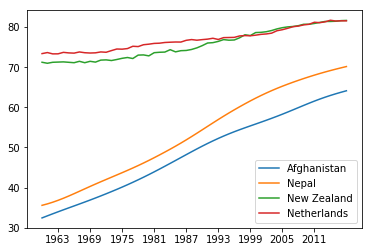

In [4]:
Afghanistan = df.loc['Afghanistan']
Nepal = df.loc['Nepal']
NewZealand = df.loc['New Zealand']
Netherlands = df.loc['Netherlands']

p0 = pl.plot(Afghanistan)
p1 = pl.plot(Nepal)
p2 = pl.plot(NewZealand)
p3 = pl.plot(Netherlands)

pl.legend()
pl.xticks(np.arange(3, len(Afghanistan) - 1, 6))

Plot Rwanda separately, and explain briefly why it has that shape (hint: use wikipedia) [2 marks]

([<matplotlib.axis.XTick at 0x24e8e879e48>,
 <a list of 9 Text xticklabel objects>)

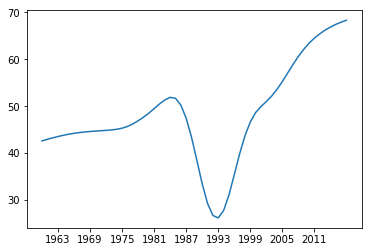

In [5]:
Rwanda = df.loc['Rwanda']
pl.plot(Rwanda)
pl.xticks(np.arange(3, len(Rwanda) - 1, 6))

#### The graph has this shape, because of the civil war that took place in 1990 until 1994 which resulted in the death of a lot of people. However, life expexstancy started to rise again in the year 2000 after the establishment of the International Criminal Tribunal for Rwanda, which caused the country's economy to thrive.

Can you detect any other countries where the life expectancy drops significantly? 

To compute this write some loops over each country and each year. If the next value is below 95% of the current value, print the name of the country.  [4 marks]

In [6]:
for i in range(len(df)):
    for j in range(len(df.iloc[i,:-1])):
        if(df.iloc[i, j] * 0.95) >= df.iloc[i, j+1]:
            print(df.index[i])
            break

Cambodia
Rwanda


Compute the mean life expectancy for each of the countries over the whole 57 years. 
Plot a bar chart of this for the first 10 countries. [4 marks]

([<matplotlib.axis.XTick at 0x24e8e90b898>,
 <a list of 10 Text xticklabel objects>)

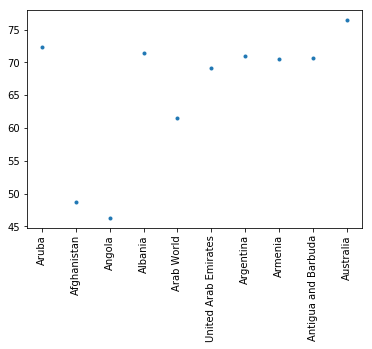

In [7]:
means = []
for i in range(len(df)):    
    means.append(np.mean(df.iloc[i,:]))
    
df.insert(len(df.iloc[0,:]) - 1, 'mean', value=means)
pl.plot(df['mean'][:10], '.')
pl.xticks(df.index[:10], rotation='vertical')

Find the 5 countries with the highest mean life expectancy and the 5 with the lowest. You might find `life.sort_values()` helpful, as well as `pd.concat`and `life.transpose`. Plot a box and whisker plot of these countries. [4 marks]

In [8]:
heighestMeans = df.sort_values('mean', ascending = False)
heighestMeans.index[:5]

Index(['Iceland', 'Japan', 'Sweden', 'Switzerland', 'Norway'], dtype='object', name='Country Name')

In [9]:
lowestMeans = df.sort_values('mean')
lowestMeans.index[:5]

Index(['Sierra Leone', 'Mali', 'South Sudan', 'Niger', 'Nigeria'], dtype='object', name='Country Name')

{'whiskers': [<matplotlib.lines.Line2D at 0x24e8e98b7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x24e8e98be48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e8e98b668>],
 'medians': [<matplotlib.lines.Line2D at 0x24e8e99e518>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e8e99e860>],
 'means': []}

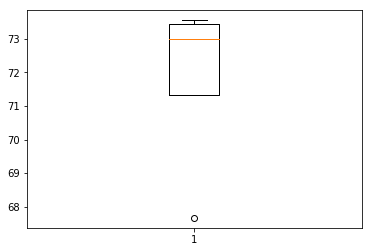

In [10]:
pl.boxplot(heighestMeans.iloc[:,0][:5])

{'whiskers': [<matplotlib.lines.Line2D at 0x24e8e9e6dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x24e8e9ef4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e8e9e6c88>],
 'medians': [<matplotlib.lines.Line2D at 0x24e8e9efb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e8e9efeb8>],
 'means': []}

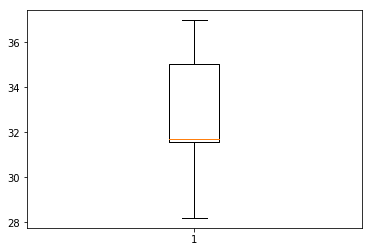

In [11]:
pl.boxplot(lowestMeans.iloc[:,0][:5])